In [ ]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [ ]:
!pip install pmdarima


In [ ]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=NTC&resolution=1D&rangeStartDate=1651391054&rangeEndDate=1768722254&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("NTC.json", "w") as f:
    json.dump(data, f)

In [ ]:
companies = ["/content/NTC.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 1653597900, 1653684300, 1653943500, 1654029900, 1654116300, 1654202700, 1654289100, 1654548300, 1654634700, 1654721100, 1654807500, 1654893900, 1655153100, 1655239500, 1655325900, 1655412300, 1655498700, 1655671500, 1655757900, 1655844300, 1655930700, 1656017100, 1656103500, 1656276300, 1656362700, 1656449100, 1656535500, 1656621900, 1656708300, 1656881100, 1656967500, 1657053900, 1657140300, 1657226700, 1657313100, 1657572300, 1657658700, 1657745100, 1657831500, 1657917900, 1658090700, 1658177100, 1658263500, 1658349900, 1658436300, 1658522700, 1658695500, 1658781900, 1658868300, 1658954700, 1659041100, 1659127500, 1659300300, 1659386700, 1659473100, 1659559500, 1659645900, 1659732300, 1659905100, 1659991500, 1660077900, 1660164300, 1660250700, 1660509900, 1660596300, 1660682700, 1660769100, 166085550

In [ ]:
df = pd.read_csv("NTC.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

861


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861 entries, 2022-05-02 to 2026-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    861 non-null    float64
 1   Close   861 non-null    float64
 2   High    861 non-null    float64
 3   Low     861 non-null    float64
 4   Volume  861 non-null    float64
dtypes: float64(5)
memory usage: 40.4 KB


<Axes: xlabel='Date'>

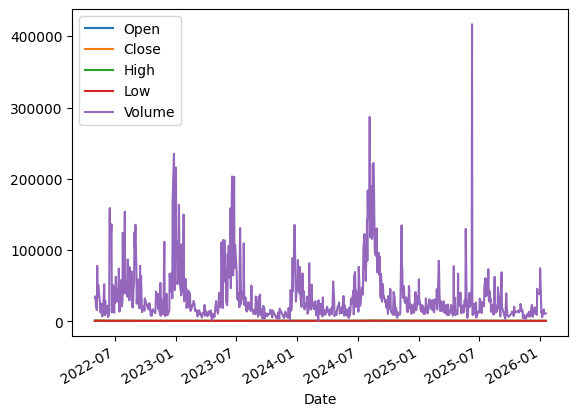

In [ ]:
df.plot()

In [ ]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"NTC {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

In [ ]:
type(df['Close'])

pandas.core.series.Series

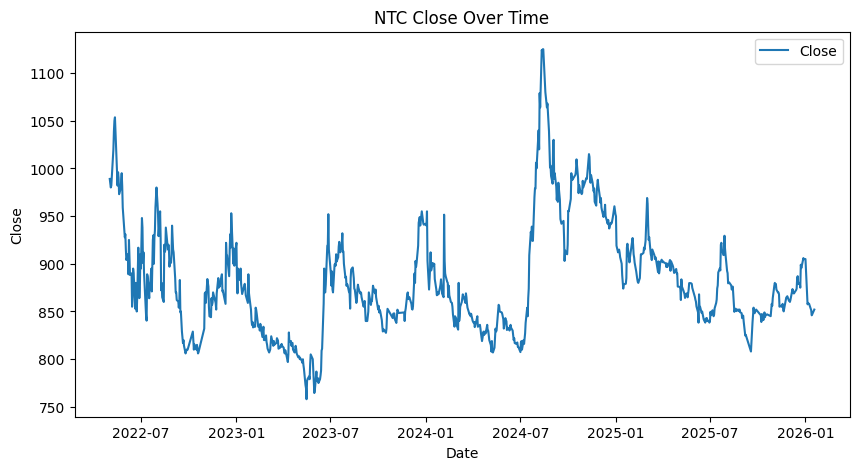

In [ ]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")


#DICKEY FULLER TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is not stationary.')

In [ ]:
adf_test(df['Close'])

ADF Statistic: -3.555781348350736
p-value: 0.006664889432543666
The series is stationary.


In [ ]:
# #using differencing
# df['Close_first_difference'] = df['Close']-df['Close'].shift(1)

In [ ]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-05-02,1032.9,989.0,1032.9,987.0,33068.0
2022-05-04,1000.0,980.0,1000.0,933.6,35215.0
2022-05-05,980.0,982.0,989.0,945.0,22683.0
2022-05-08,982.0,1010.0,1010.0,947.0,16033.0
2022-05-09,1010.0,1020.0,1028.0,980.0,77958.0


In [ ]:
# adf_test(df['Close_first_difference'].dropna())

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

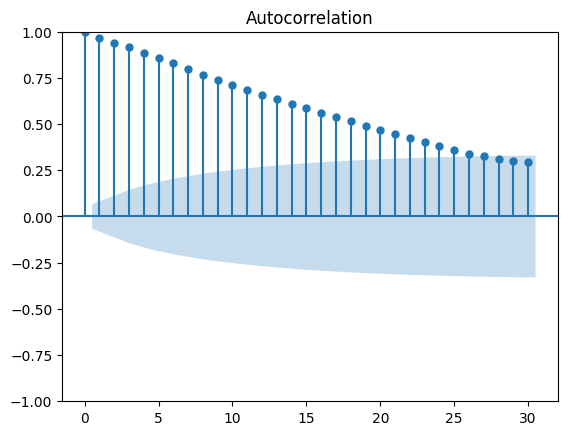

In [ ]:
acf = plot_acf(df['Close'])

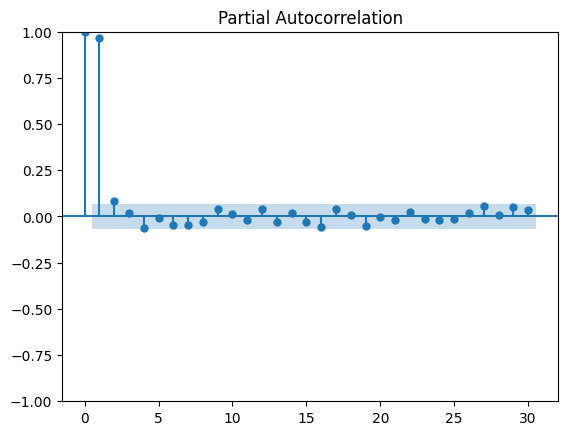

In [ ]:
result = plot_pacf(df['Close'])

In [ ]:
to_row=int(len(df)*0.8)
training_data=list(df[0:to_row]['Close'])
testing_data=list(df[to_row:]['Close'])

In [ ]:
testing_data

[896.73,
 899.84,
 903.95,
 892.68,
 902.74,
 898.67,
 896.99,
 893.38,
 890.39,
 891.37,
 894.57,
 890.01,
 890.05,
 876.13,
 875.81,
 873.71,
 862.04,
 883.69,
 876.14,
 871.84,
 868.18,
 864.23,
 868.19,
 869.09,
 869.09,
 864.85,
 869.4,
 873.04,
 879.77,
 879.71,
 879.45,
 878.94,
 874.75,
 865.14,
 862.32,
 860.4,
 855.37,
 849.24,
 838.29,
 867.97,
 853.97,
 854.96,
 848.46,
 849.96,
 847.09,
 844.6,
 841.64,
 838.36,
 842.62,
 840.52,
 843.11,
 839.88,
 840.48,
 838.34,
 840.13,
 849.64,
 846.03,
 851.24,
 848.77,
 845.03,
 846.55,
 853.3,
 858.96,
 862.55,
 874.18,
 877.27,
 890.89,
 895.16,
 893.08,
 919.94,
 922.0,
 915.0,
 909.17,
 909.64,
 929.41,
 916.16,
 909.61,
 892.57,
 890.26,
 879.54,
 880.16,
 880.49,
 877.37,
 872.99,
 874.58,
 876.08,
 849.61,
 851.52,
 852.81,
 852.79,
 850.4,
 852.12,
 850.91,
 850.34,
 852.06,
 849.32,
 848.27,
 843.03,
 844.1,
 845.66,
 839.51,
 824.74,
 825.52,
 808.0,
 838.6,
 854.0,
 849.0,
 848.2,
 852.0,
 846.0,
 839.0,
 847.3,
 841.0,
 

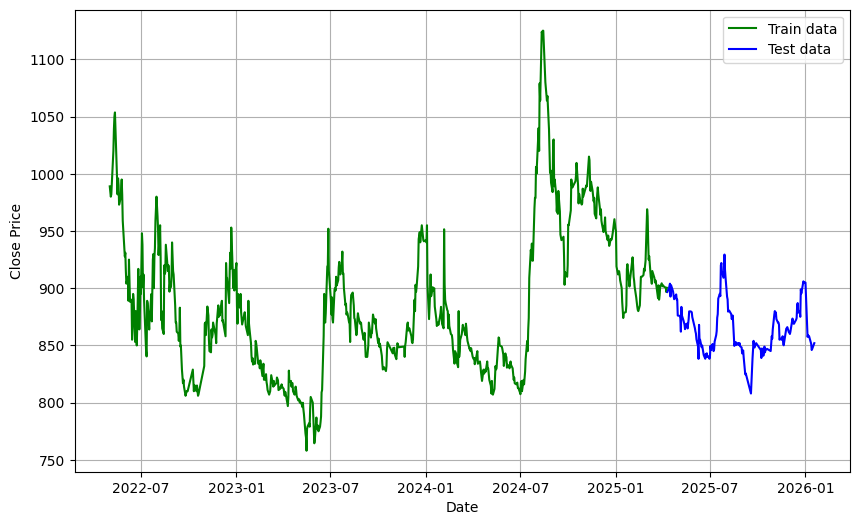

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [ ]:
model_predictions=[]
n_test_obser = len(testing_data)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions=[]
n_test_obser = len(testing_data)

for i in range(n_test_obser):
  model= ARIMA(training_data,order=(2,0,0))

  model_fit = model.fit()

  output = model_fit.forecast()

  model_predictions.append(output)
  actual_test_value = testing_data[i]

  training_data.append(actual_test_value)
  print(output)

[852.47382797]
[892.68356454]
[899.22349518]
[903.14240893]
[893.44258385]
[901.4665747]
[898.68205996]
[896.84786726]
[893.49519511]
[890.53349152]
[891.15706867]
[894.08692814]
[890.2951108]
[889.95110487]
[877.56628794]
[876.1225027]
[874.22636586]
[863.66188123]
[881.9393793]
[877.05731137]
[872.5954022]
[868.97846953]
[865.15776171]
[868.34219326]
[869.47646663]
[869.55206187]
[865.78365124]
[869.46731392]
[873.08674309]
[879.37534629]
[879.89002347]
[879.65370483]
[879.17831966]
[875.41129174]
[866.51407551]
[863.19674009]
[861.25376275]
[856.61526241]
[850.73764389]
[840.47293203]
[865.93765358]
[856.04500741]
[855.70513452]
[850.02687533]
[850.79070603]
[848.37477366]
[845.91545514]
[843.07185943]
[839.90297442]
[843.3954939]
[841.90085529]
[844.01381523]
[841.37222066]
[841.62126414]
[839.77317062]
[841.17265491]
[849.76305826]
[847.38742575]
[851.69057611]
[849.95418244]
[846.42110283]
[847.44092496]
[853.55725948]
[859.1635973]
[862.83818675]
[873.46523277]
[877.21236366]
[8

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1033
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -4144.204
Date:                Mon, 19 Jan 2026   AIC                           8296.408
Time:                        14:56:04   BIC                           8316.169
Sample:                             0   HQIC                          8303.906
                               - 1033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        881.9129     15.474     56.994      0.000     851.585     912.241
ar.L1          0.8907      0.024     36.681      0.000       0.843       0.938
ar.L2          0.0810      0.023      3.510      0.0

In [ ]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)


<class 'list'>
(173, 1)
[array([852.47382797]), array([892.68356454]), array([899.22349518]), array([903.14240893]), array([893.44258385]), array([901.4665747]), array([898.68205996]), array([896.84786726]), array([893.49519511]), array([890.53349152]), array([891.15706867]), array([894.08692814]), array([890.2951108]), array([889.95110487]), array([877.56628794]), array([876.1225027]), array([874.22636586]), array([863.66188123]), array([881.9393793]), array([877.05731137]), array([872.5954022]), array([868.97846953]), array([865.15776171]), array([868.34219326]), array([869.47646663]), array([869.55206187]), array([865.78365124]), array([869.46731392]), array([873.08674309]), array([879.37534629]), array([879.89002347]), array([879.65370483]), array([879.17831966]), array([875.41129174]), array([866.51407551]), array([863.19674009]), array([861.25376275]), array([856.61526241]), array([850.73764389]), array([840.47293203]), array([865.93765358]), array([856.04500741]), array([855.705

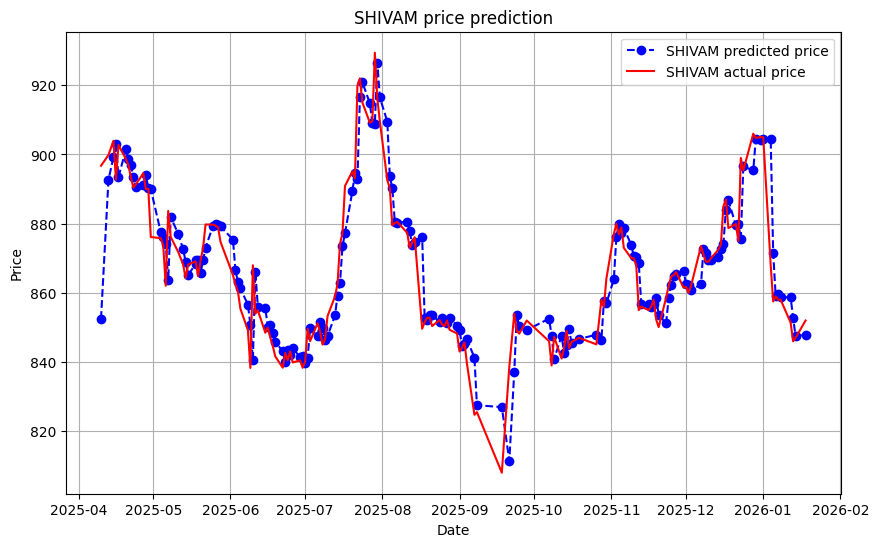

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='NTC predicted price')
plt.plot(date_range, testing_data,color='red',label='SHIVAM actual price')

plt.title('NTC price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.006436332820271837
